In [30]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pylab as plt

# Read the dataset into a DataFrame
data = pd.read_csv('mall_customers.csv')

data


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [31]:
#transform Gender to numerical
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to '

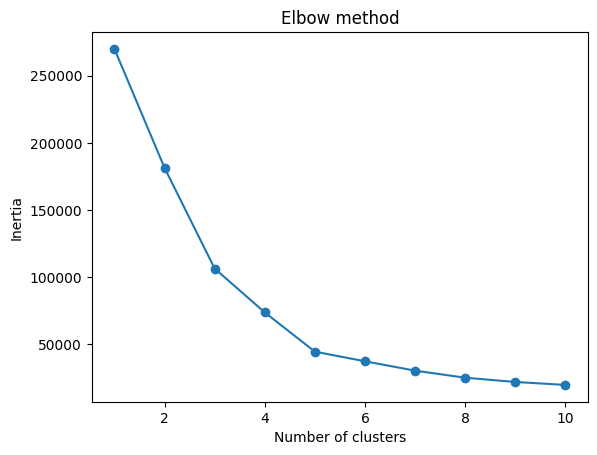

In [32]:
from sklearn.cluster import KMeans

#Selectin two features for clusting
selected_features = data[['Annual Income (k$)', 'Spending Score (1-100)']]

#Elbo Method for choosing best K
inertias = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(selected_features)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


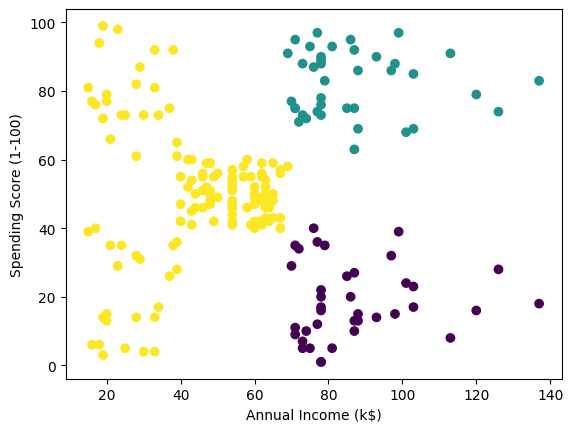

In [33]:


# Initialize K-means with the desired number of clusters (K)
k = 3
kmeans = KMeans(n_clusters=k)

# Fit the K-means model to the selected features
kmeans.fit(selected_features)

# Obtain the cluster labels for each data point
labels = kmeans.labels_

# Add the cluster labels to the DataFrame
data['Cluster'] = labels

# Plot the data points with different colors based on their cluster assignments
plt.scatter(selected_features['Annual Income (k$)'], selected_features['Spending Score (1-100)'], c=labels)

plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
#plt.title("K-means Clustering")

# Display the plot
plt.show()
